In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import matplotlib as mp
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS 
from statsmodels.sandbox.regression.gmm import GMM
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve

In [2]:
df_1 = pd.read_csv(r"C:\Users\oscar\Downloads\midterm_partone.csv")

In [3]:
df_2 = pd.read_csv(r"C:\Users\oscar\Downloads\midterm_parttwo.csv")

In [4]:
df_1

,Constant,Stock Change,Inventory Turnover,Operating Profit,Interaction Effect,Current Ratio,Quick Ratio,Debt Asset Ratio
0,1,0.870332,1.795946,0.115846,0.208053,1.672527,0.255171,0.473317
1,1,-0.047347,1.395501,0.436967,0.609788,1.637261,0.221763,0.489967
2,1,0.001176,1.664563,0.541016,0.900555,1.640619,0.189141,0.374269
3,1,-0.901200,1.605738,0.539399,0.866133,1.436221,0.131944,0.224399
4,1,-0.176353,1.591451,0.539938,0.859285,1.433140,0.183095,0.213446
...,...,...,...,...,...,...,...,...
1691,1,-0.015543,5.225766,0.309119,1.615384,3.554503,2.197871,0.005549
1692,1,0.399089,5.324390,0.274782,1.463044,3.745006,2.324502,0.004359
1693,1,-0.702200,5.575258,0.287503,1.602905,3.434909,2.282626,0.000000
1694,1,0.283926,5.423463,0.256657,1.391968,2.876645,1.454948,0.000000


Q1

In [5]:
y_vals  = np.array(df_1["Stock Change"])
x_vals  = np.array(df_1[["Inventory Turnover","Operating Profit","Interaction Effect"]])
iv_vals = np.array(df_1[["Current Ratio","Quick Ratio","Debt Asset Ratio"]])

class gmm(GMM):
    def momcond(self, params):
        p0, p1, p2, p3 = params
        endog = self.endog
        exog = self.exog
        inst = self.instrument   

        error0 = endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]
        error1 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * exog[:,1]
        error2 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * exog[:,2]
        error3 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,0] 
        error4 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,1] 
        error5 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,2] 

        g = np.column_stack((error0, error1, error2, error3, error4, error5))
        return g


beta0 = np.array([0.1, 0.1, 0.1, 0.1])
res = gmm(endog = y_vals, exog = x_vals, instrument = iv_vals, k_moms=6, k_params=4).fit(beta0)

res.summary()


Optimization terminated successfully.
         Current function value: 0.000046
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000373
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000372
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000372
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000372
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 gmm Results                                  
==============================================================================
Dep. Variable:                      y   Hansen J:                       0.6317
Model:                            gmm   Prob (Hansen J):                 0.729
Method:                           GMM                                         
Date:                Tue, 07 Nov 2023                                         
Time:                        16:29:19                                         
No. Observations:                1696                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p 0           -0.0200      0.021     -0.964      0.335      -0.061       0.021
p 1            0.0011      0.001      1.843      0.065   -6.89e-05       0.002
p 2           -0.1071      0.032     -3.370      0.001      -0.169      -0.045
p 3            0.0011      0.000      2.760      0.006       0.000       0.002
==============================================================================
"""

In [10]:
y_vals  = np.array(df_1["Stock Change"])
x_vals  = np.array(df_1[["Inventory Turnover","Operating Profit","Interaction Effect"]])
iv_vals = np.array(df_1[["Current Ratio","Quick Ratio","Debt Asset Ratio"]])

class gmm(GMM):
    def momcond(self, params):
        p0, p1, p2, p3, delta = params
        endog = self.endog
        exog = self.exog
        inst = self.instrument   

        error0 = endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]
        error1 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * exog[:,1]
        error2 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * exog[:,2]
        error3 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,0] - delta
        error4 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,1] - delta 
        error5 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,2] - delta 

        g = np.column_stack((error0, error1, error2, error3, error4, error5))
        return g


beta0 = np.array([0.1, 0.1, 0.1, 0.1, 0.1])
res = gmm(endog = y_vals, exog = x_vals, instrument = iv_vals, k_moms=6, k_params=5).fit(beta0)

res.summary()

Optimization terminated successfully.
         Current function value: 0.000031
         Iterations: 10
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.000345
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000346
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000346
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 gmm Results                                  
==============================================================================
Dep. Variable:                      y   Hansen J:                       0.5862
Model:                            gmm   Prob (Hansen J):                 0.444
Method:                           GMM                                         
Date:                Wed, 08 Nov 2023                                         
Time:                        00:26:03                                         
No. Observations:                1696                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p 0           -0.0208      0.021     -0.986      0.324      -0.062       0.020
p 1            0.0011      0.001      1.839      0.066   -7.31e-05       0.002
p 2           -0.1062      0.032     -3.316      0.001      -0.169      -0.043
p 3            0.0011      0.000      2.688      0.007       0.000       0.002
p 4           -0.0006      0.003     -0.213      0.831      -0.006       0.005
==============================================================================
"""

The P value of p4 which is delta in the gmm model is 0.831, which is higher than 0.05. Indicating that p4 is not statistically different from zero. Therefore, the industry expert’s claim is not statistically justified. 

Q2

In [21]:
df_2

,Years of Education after High School,Requested Credit Amount,Number of Dependents,Monthly Income,Monthly Expense,Marital Status,Credit Rating
0,1,Low,No dependent,Very low,Very low,Married,1
1,2,Low,No dependent,Very low,Very low,Single,1
2,1,Low,No dependent,Very low,Very low,Single,1
3,3,Low,No dependent,Very low,Very low,Married,1
4,3,Low,No dependent,Very low,Very low,Single,0
...,...,...,...,...,...,...,...
8076,3,Low,Less than 2,Very High,Very high,Married,1
8077,3,Medium,Less than 2,Very High,Very high,Married,0
8078,3,Medium,More than 2,Very High,Very high,Married,1
8079,7,Medium,Less than 2,Very High,Very high,Married,1


In [22]:
df_2.columns

Index(['Years of Education after High School', 'Requested Credit Amount',
       'Number of Dependents', 'Monthly Income', 'Monthly Expense',
       'Marital Status', 'Credit Rating'],
      dtype='object')

In [23]:
import pandas as pd

# List of columns to one-hot encode
columns_to_encode = ['Requested Credit Amount', 'Number of Dependents', 'Monthly Income', 'Monthly Expense', 'Marital Status']

# Perform one-hot encoding
df_2 = pd.get_dummies(df_2, columns=columns_to_encode, drop_first=True)


In [24]:
df_2

,Years of Education after High School,Credit Rating,Requested Credit Amount_Low,Requested Credit Amount_Medium,Number of Dependents_More than 2,Number of Dependents_No dependent,Monthly Income_Low,Monthly Income_Moderate,Monthly Income_Very High,Monthly Income_Very low,Monthly Expense_Low,Monthly Expense_Moderate,Monthly Expense_Very high,Monthly Expense_Very low,Marital Status_Not specified,Marital Status_Single
0,1,1,True,False,False,True,False,False,False,True,False,False,False,True,False,False
1,2,1,True,False,False,True,False,False,False,True,False,False,False,True,False,True
2,1,1,True,False,False,True,False,False,False,True,False,False,False,True,False,True
3,3,1,True,False,False,True,False,False,False,True,False,False,False,True,False,False
4,3,0,True,False,False,True,False,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8076,3,1,True,False,False,False,False,False,True,False,False,False,True,False,False,False
8077,3,0,False,True,False,False,False,False,True,False,False,False,True,False,False,False
8078,3,1,False,True,True,False,False,False,True,False,False,False,True,False,False,False
8079,7,1,False,True,False,False,False,False,True,False,False,False,True,False,False,False


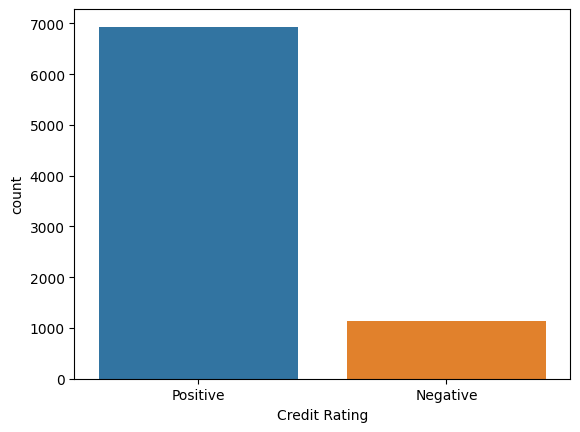

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the distribution of 'Survived'
sns.countplot(x='Credit Rating', data=df_2)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the 'Credit Rating' column
df_2['Credit Rating'] = label_encoder.fit_transform(df_2['Credit Rating'])

# Split the data into training and testing sets
X = df_2.drop('Credit Rating', axis=1)  # Make sure to specify axis=1 to drop the target column
y = df_2['Credit Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create a LogisticRegression model with increased max_iter
logistic_reg = LogisticRegression(max_iter=20000)  # Increase max_iter to a larger value

# Fit the logistic regression model on the scaled data
logistic_reg.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = logistic_reg.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the confusion matrix and evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Confusion Matrix:
[[   0  577]
 [   0 3464]]
True Positives: 3464
True Negatives: 0
False Positives: 577
False Negatives: 0
Accuracy: 0.8572135609997525
Precision: 0.8572135609997525
Recall: 1.0
F1-score: 0.9231179213857428


In [26]:
import numpy as np

# Calculate the 85th percentile threshold for approval
threshold = np.percentile(logistic_reg.predict_proba(X_test)[:, 1], 85)

# Update the predictions based on the new threshold
y_pred_updated = (logistic_reg.predict_proba(X_test)[:, 1] > threshold).astype(int)

# Create a confusion matrix
conf_matrix_updated = confusion_matrix(y_test, y_pred_updated)

# Extract TP, TN, FP, FN from the updated confusion matrix
TP_updated = conf_matrix_updated[1, 1]
TN_updated = conf_matrix_updated[0, 0]
FP_updated = conf_matrix_updated[0, 1]
FN_updated = conf_matrix_updated[1, 0]

# Calculate updated evaluation metrics
accuracy_updated = accuracy_score(y_test, y_pred_updated)
precision_updated = precision_score(y_test, y_pred_updated)
recall_updated = recall_score(y_test, y_pred_updated)
f1_updated = f1_score(y_test, y_pred_updated)

# Print the updated confusion matrix and evaluation metrics
print("Updated Confusion Matrix:")
print(conf_matrix_updated)
print("Updated True Positives:", TP_updated)
print("Updated True Negatives:", TN_updated)
print("Updated False Positives:", FP_updated)
print("Updated False Negatives:", FN_updated)

print("Updated Accuracy:", accuracy_updated)
print("Updated Precision:", precision_updated)
print("Updated Recall:", recall_updated)
print("Updated F1-score:", f1_updated)



Updated Confusion Matrix:
[[ 496   81]
 [2940  524]]
Updated True Positives: 524
Updated True Negatives: 496
Updated False Positives: 81
Updated False Negatives: 2940
Updated Accuracy: 0.2524127691165553
Updated Precision: 0.8661157024793389
Updated Recall: 0.151270207852194
Updated F1-score: 0.2575571393462768
